### Make figures for presentation and report ###

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Startup times ###

In [20]:
# Startup times collected from startup script
startup_times = {
    "Docker": 3.0217,
    "Enclave": 14.07657
}

colors = ['#05aff2', '#056cf2']

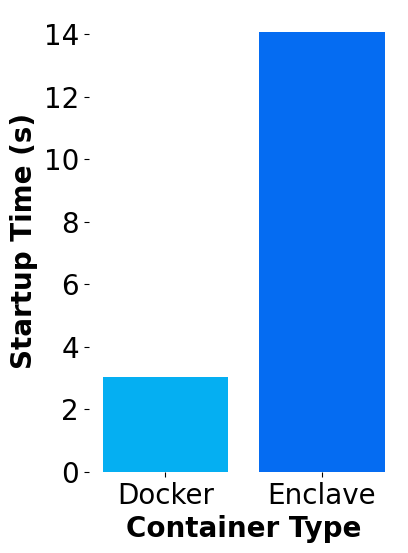

In [22]:
plt.figure(figsize=(4, 6))  
plt.bar(startup_times.keys(),
        startup_times.values(),
        color=colors, width=0.8)

plt.xlabel('Container Type', fontsize=20, fontweight='bold')
plt.ylabel('Startup Time (s)', fontsize=20, fontweight='bold')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

for spine in plt.gca().spines.values():
   spine.set_visible(False)

plt.show()

### Iperf throughput ###

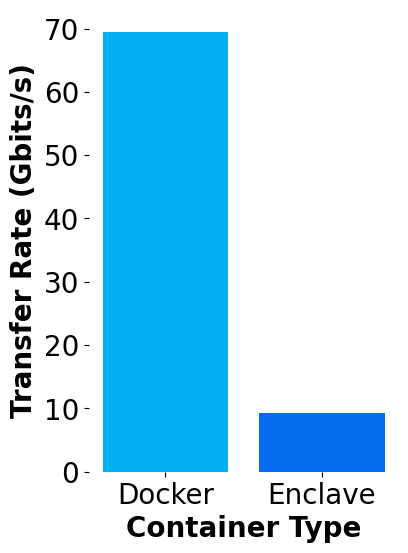

In [23]:
# Transfer bitrates collected from iperf results
transfer_bitrates = {
    "Docker": 69.5,
    "Enclave": 9.28
}

plt.figure(figsize=(4, 6))  
plt.bar(transfer_bitrates.keys(),
        transfer_bitrates.values(),
        color=colors, width=0.8)

plt.xlabel('Container Type', fontsize=20, fontweight='bold')
plt.ylabel('Transfer Rate (Gbits/s)', fontsize=20, fontweight='bold')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

for spine in plt.gca().spines.values():
   spine.set_visible(False)

plt.show()

### Local load test ###

In [11]:
public_local_csv1 = "../image_classification/load_testing_results/public_local_batch2_req2_1-100_threads.csv"
public_local_csv2 = "../image_classification/load_testing_results/public_local_batch2_req2_100-300_threads.csv"
enclave_local_csv1 = "../image_classification/load_testing_results/enclave_local_batch2_req2_1-100_threads.csv"
enclave_local_csv2 = "../image_classification/load_testing_results/enclave_local_batch2_req2_100-300_threads.csv"

public_local_df1 = pd.read_csv(public_local_csv1)
public_local_df2 = pd.read_csv(public_local_csv2)
public_local_df = pd.concat([public_local_df1, public_local_df2])

enclave_local_df1 = pd.read_csv(enclave_local_csv1)
enclave_local_df2 = pd.read_csv(enclave_local_csv2)
enclave_local_df = pd.concat([enclave_local_df1, enclave_local_df2])

public_local_df["type"] = "Docker"
enclave_local_df["type"] = "Enclave"

local_df = pd.concat([public_local_df, enclave_local_df])
local_df

,Threads,Average Latency,Min Latency,Max Latency,type
0,1,0.066012,0.049500,0.082524,Docker
1,10,0.348301,0.058800,0.457971,Docker
2,20,0.663274,0.056615,0.880907,Docker
3,30,1.024533,0.057931,1.378886,Docker
4,40,1.316248,0.066571,1.871256,Docker
5,50,1.666972,0.059381,2.266975,Docker
6,60,1.942799,0.061618,2.622456,Docker
7,70,2.336639,0.064812,3.193673,Docker
8,80,2.598222,0.055654,3.530862,Docker
9,90,2.937487,0.056580,3.977879,Docker


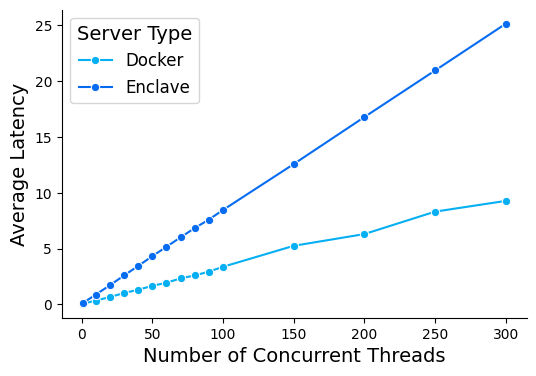

In [20]:
palette = {'Docker': '#05aff2', 'Enclave': '#056cf2'} 

plt.figure(figsize=(6, 4))
sns.lineplot(data=local_df, x='Threads', y='Average Latency', hue='type', palette=palette, marker = 'o')

sns.despine()
plt.xlabel('Number of Concurrent Threads', fontsize=14)
plt.ylabel('Average Latency', fontsize=14)
plt.legend(title='Server Type', title_fontsize='14', fontsize='12')

plt.show()

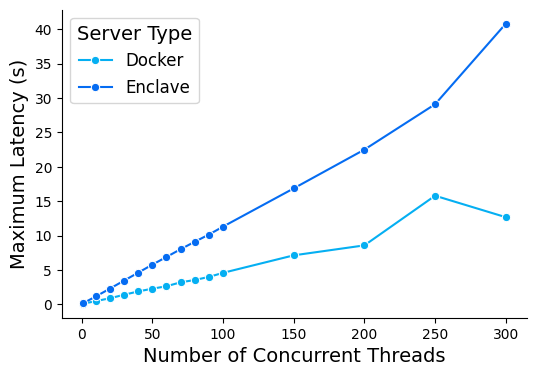

In [22]:
palette = {'Docker': '#05aff2', 'Enclave': '#056cf2'} 

plt.figure(figsize=(6, 4))
sns.lineplot(data=local_df, x='Threads', y='Max Latency', hue='type', palette=palette, marker = 'o')

sns.despine()
plt.xlabel('Number of Concurrent Threads', fontsize=14)
plt.ylabel('Maximum Latency (s)', fontsize=14)
plt.legend(title='Server Type', title_fontsize='14', fontsize='12')

plt.show()

### Internet load test ###

In [25]:
public_net_df = pd.read_csv("../image_classification/load_testing_results/public_batch2_req2_vary_threads.csv")
enclave_net_df = pd.read_csv("../image_classification/load_testing_results/enclave_batch2_req2_vary_threads.csv")

public_net_df["type"] = "Docker"
enclave_net_df["type"] = "Enclave"

internet_df = pd.concat([public_net_df, enclave_net_df])
internet_df

,Threads,Average Latency,Min Latency,Max Latency,type
0,1,0.641457,0.398979,0.883936,Docker
1,10,1.850604,0.593316,3.570738,Docker
2,20,3.433693,1.370259,6.310858,Docker
3,30,5.193056,2.399703,9.663908,Docker
4,40,6.695951,2.406608,12.708029,Docker
5,50,8.876800,3.251010,16.367374,Docker
6,60,10.847188,3.514524,20.139943,Docker
7,70,13.682620,4.977048,26.181338,Docker
8,80,15.866587,5.937340,34.374709,Docker
9,90,18.212437,7.716678,39.114710,Docker


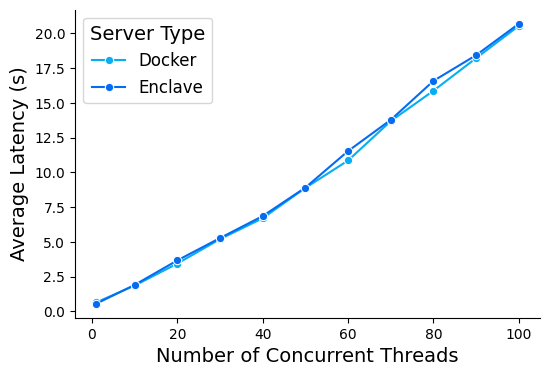

In [27]:
palette = {'Docker': '#05aff2', 'Enclave': '#056cf2'} 

plt.figure(figsize=(6, 4))
sns.lineplot(data=internet_df, x='Threads', y='Average Latency', hue='type', palette=palette, marker = 'o')

sns.despine()
plt.xlabel('Number of Concurrent Threads', fontsize=14)
plt.ylabel('Average Latency (s)', fontsize=14)
plt.legend(title='Server Type', title_fontsize='14', fontsize='12')

plt.show()

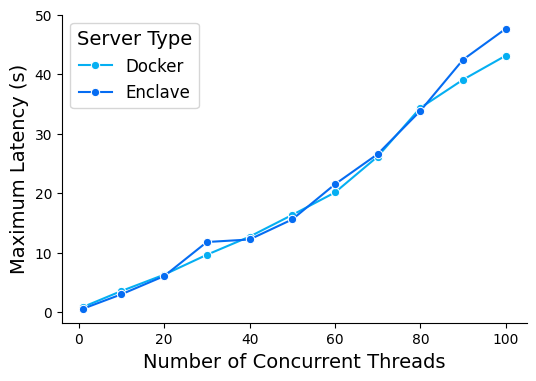

In [26]:
palette = {'Docker': '#05aff2', 'Enclave': '#056cf2'} 

plt.figure(figsize=(6, 4))
sns.lineplot(data=internet_df, x='Threads', y='Max Latency', hue='type', palette=palette, marker = 'o')

sns.despine()
plt.xlabel('Number of Concurrent Threads', fontsize=14)
plt.ylabel('Maximum Latency (s)', fontsize=14)
plt.legend(title='Server Type', title_fontsize='14', fontsize='12')

plt.show()